In [1]:
%reload_ext autoreload

%autoreload 2

In [2]:
input_file = "../../test_data/system_tests/diann_charite_dataset/Charite-DIA-NN_analysis.txt"
#input_file = "../../test_data/system_tests/diann_charite_dataset/Charite-DIA-NN_analysis.txt.diann_precursor_filename_sampleid.aq_reformat.tsv"
input_file = "../../test_data/system_tests/diann_charite_dataset/Charite-DIA-NN_analysis.txt.diann_fragion_isotopes_raw_charite_dataset.aq_reformat.tsv"

directlfq_file = "../../test_data/system_tests/diann_charite_dataset/Charite-DIA-NN_analysis.txt.diann_fragion_isotopes_raw_charite_dataset.protein_intensities.tsv"

samplemap ="../../test_data/system_tests/diann_charite_dataset/samplemap_shortened.tsv"

diann_lfq_file = "../../test_data/system_tests/diann_charite_dataset/Charite-DIA-NN_analysis.txt.diann_gene.aq_reformat.tsv"
iq_lfq_file = "../../test_data/system_tests/diann_charite_dataset/report-charite-iq.tsv"

outfile = "../../test_data/system_tests/diann_charite_dataset/cv_distribution_charite_cohort.pdf"

run_directlfq = True

In [3]:
if run_directlfq:
    import directlfq.lfq_manager as lfqmgr

    lfqmgr.run_lfq(input_file=input_file,  min_nonan=2, num_cores=None)#input_type_to_use="diann_fragion_isotopes_raw_charite_dataset",


2024-01-24 15:37:37,132 - directlfq.lfq_manager - INFO - Starting directLFQ analysis.
2024-01-24 15:37:40,357 - directlfq.lfq_manager - INFO - Performing sample normalization.
2024-01-24 15:37:42,865 - directlfq.lfq_manager - INFO - Estimating lfq intensities.
2024-01-24 15:37:42,868 - directlfq.protein_intensity_estimation - INFO - 394 lfq-groups total
2024-01-24 15:37:43,085 - directlfq.protein_intensity_estimation - INFO - using 10 processes
2024-01-24 15:37:43,221 - directlfq.protein_intensity_estimation - INFO - lfq-object 0
/Users/constantin/opt/anaconda3/envs/directlfq/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
2024-01-24 15:37:46,809 - directlfq.protein_intensity_estimation - INFO - lfq-object 100
/Users/constantin/opt/anaconda3/envs/directlfq/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, 

In [4]:

import directlfq.benchmarking as lfqbenchmark
restable_directlfq = lfqbenchmark.ResultsTableBiological(results_file=directlfq_file, samplemap=samplemap, name="directLFQ\n")
cvinfo_directlfq = lfqbenchmark.CVInfoDataset(restable_directlfq)

In [5]:
import directlfq.benchmarking as lfqbenchmark
restable_diann = lfqbenchmark.ResultsTableBiological(results_file=diann_lfq_file, samplemap=samplemap, name = "MaxLFQ DIA-NN\n")
cvinfo_diann = lfqbenchmark.CVInfoDataset(restable_diann)

In [6]:
import directlfq.benchmarking as lfqbenchmark
restable_iq = lfqbenchmark.ResultsTableBiological(results_file=iq_lfq_file, samplemap=samplemap, name = "MaxLFQ iq\n")
cvinfo_iq = lfqbenchmark.CVInfoDataset(restable_iq)

31 are very large for directLFQ

1875
0.15809520229607454
0.11825385668813118
50 are very large for MaxLFQ DIA-NN

1982
0.1632490777950846
0.13240989113091897
10 are very large for MaxLFQ iq

1698
0.13798939045114358
0.12633659011044102


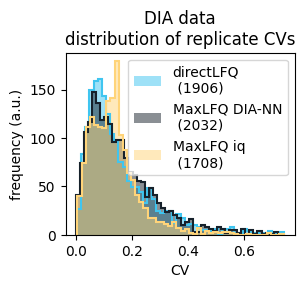

In [7]:
import matplotlib.pyplot as plt
ax = plt.subplot()
ax.figure.set_size_inches(1.25*2.363,2.363)
lfqbenchmark.CVDistributionPlotter(list_of_dataset_cv_infos=[cvinfo_directlfq, cvinfo_diann, cvinfo_iq], ax = ax,cumulative=False, density=False, bins=50, histtype='step')
ax.legend()

ax.set_title("DIA data\ndistribution of replicate CVs")
ax.set_xlabel("CV")
ax.set_ylabel('frequency (a.u.)')

plt.savefig(outfile, bbox_inches='tight', dpi=300)
plt.savefig(outfile.replace(".pdf", ".png"), bbox_inches='tight', dpi=300)